# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.


# Exploratory Data Analysis (EDA)

In [479]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv' #load dataset
df = pd.read_csv(url)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [480]:
df.shape

(202, 26)

In [481]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [483]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,202.000000,165.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,0.831683,121.836364,98.848020,174.273267,65.903960,53.775248,2558.173267,126.945545,10.160990,25.148515,30.658416,13253.752475
std,1.258360,35.396412,6.094523,12.334330,2.106915,2.444769,517.236654,41.455269,3.995264,6.421956,6.809940,7954.919591
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,94.500000,166.800000,64.125000,52.000000,2174.250000,98.000000,8.600000,19.000000,25.000000,7778.250000
50%,1.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.000000,9.000000,24.000000,30.000000,10320.000000
75%,2.000000,150.000000,102.400000,183.500000,66.825000,55.500000,2932.750000,141.000000,9.400000,30.000000,34.000000,16502.250000
max,3.000000,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


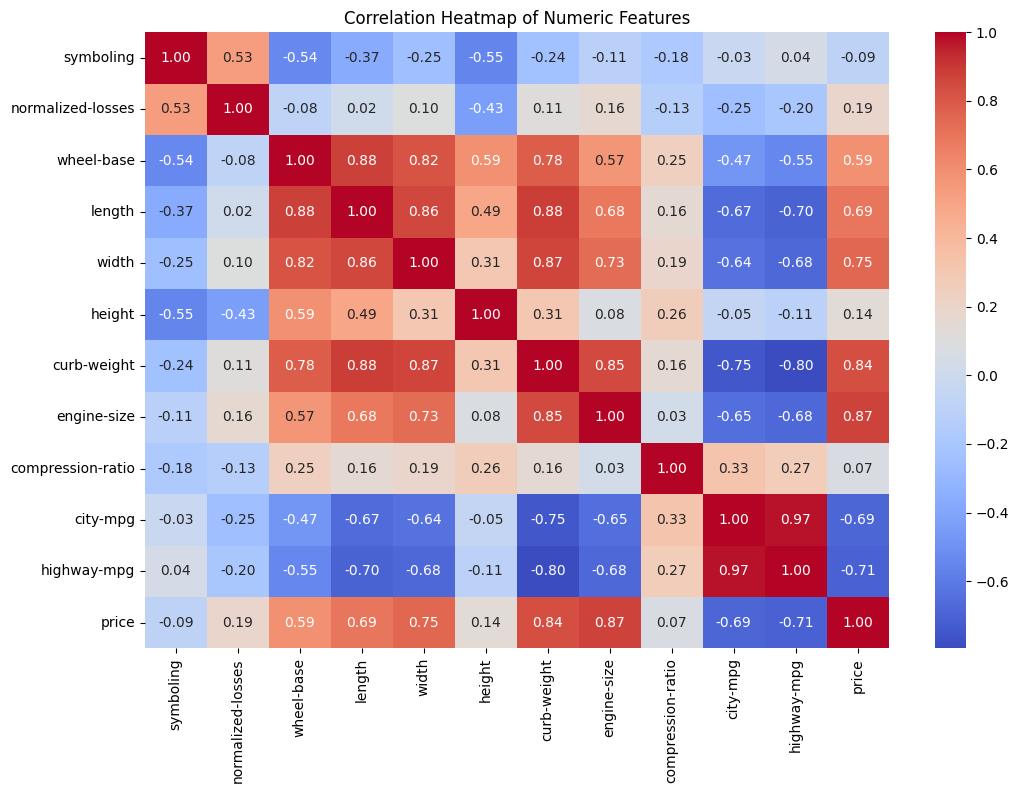

In [484]:
#Correlation Heatmap

plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

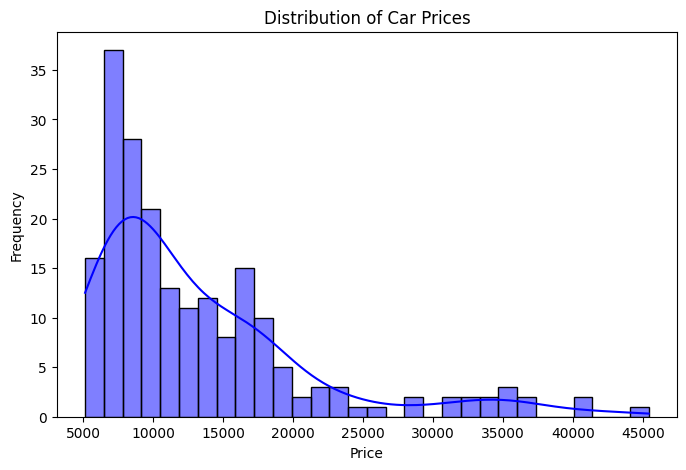

In [485]:
#Price Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df["price"], bins=30, kde=True, color= 'blue')
plt.title("Distribution of Car Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

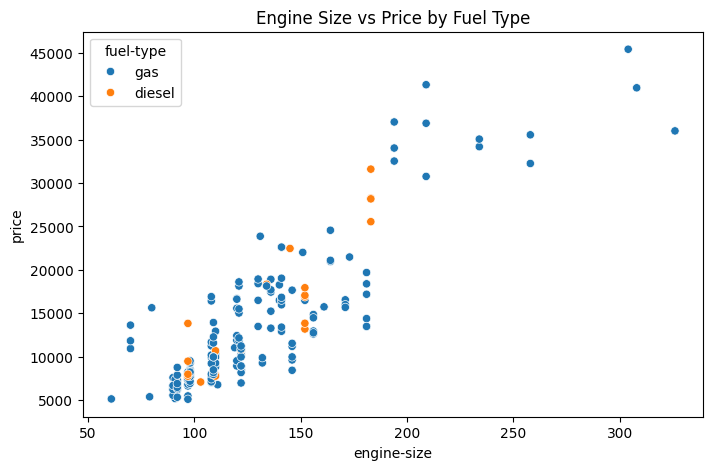

In [486]:
#Engine Size vs Price

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="engine-size", y="price", hue="fuel-type")
plt.title("Engine Size vs Price by Fuel Type")
plt.show()

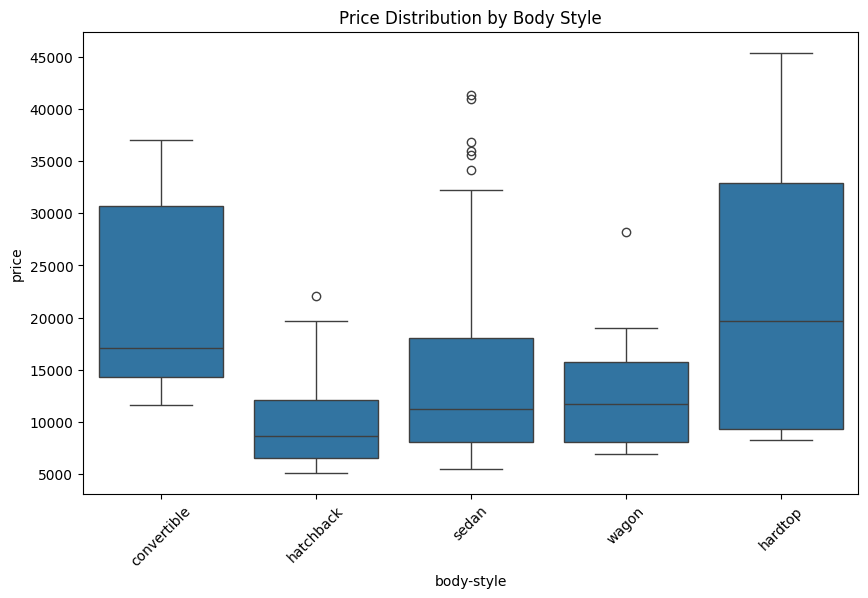

In [487]:
#Body Style vs Price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="body-style", y="price")
plt.title("Price Distribution by Body Style")
plt.xticks(rotation=45)
plt.show()

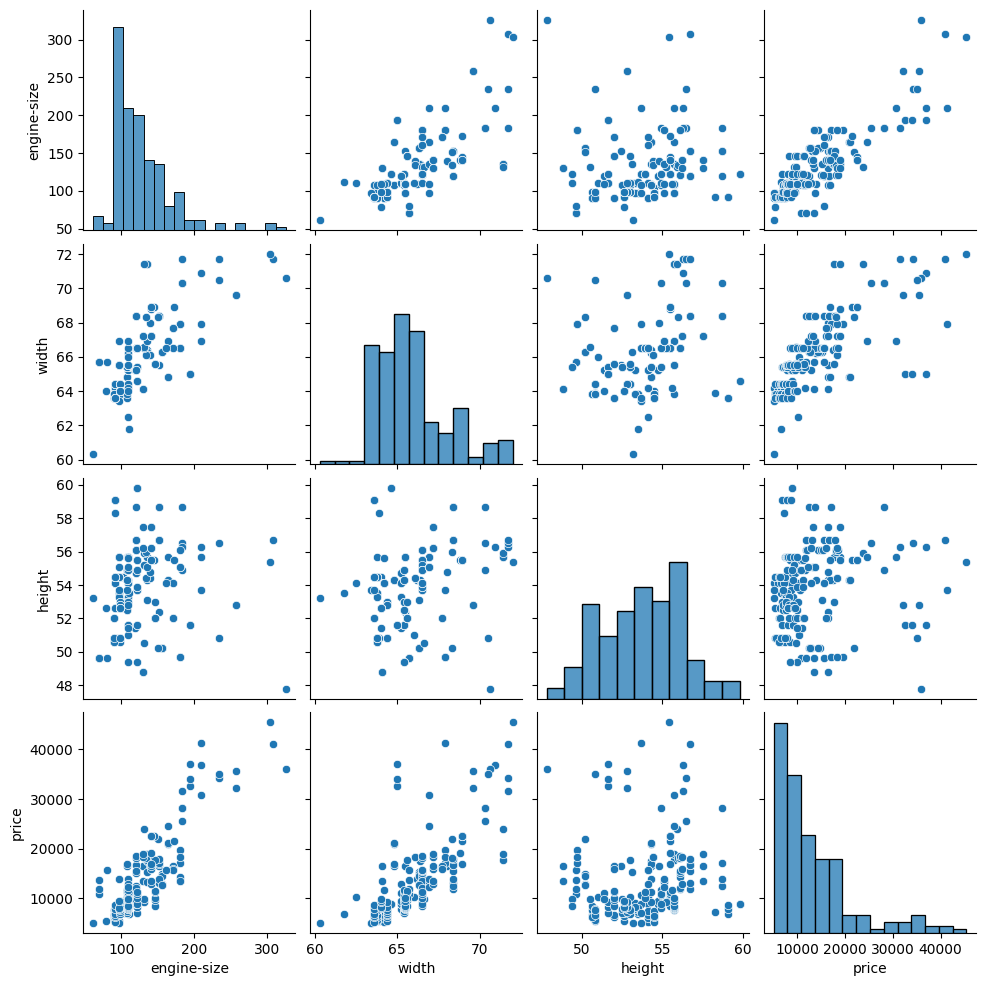

In [488]:
#Pairplot of Key Features

selected_features = ["engine-size", "horsepower", "width", "height", "price"]
sns.pairplot(df[selected_features].dropna())
plt.show()

# Missing Value Handling

In [490]:
#Convert numeric columns to proper numeric type
for col in ["horsepower", "peak-rpm", "bore", "stroke"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

#Check missing values before handling
print("Missing Values Before Handling:\n", df.isnull().sum())

# Strategy:
# - Numerical columns -> fill with median
# - Categorical columns -> fill with mode

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

#Check missing values after handling
print("\nMissing Values After Handling:\n", df.isnull().sum())

Missing Values Before Handling:
 symboling             0
normalized-losses    37
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

Missing Values After Handling:
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               

In [491]:
df.head(30)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450
5,2,115.0,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710
7,1,115.0,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875
9,2,192.0,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430


# Feature Engineering

In [493]:
#Create new engineered features

#Power-to-Weight Ratio
df["power_to_weight"] = df["horsepower"] / df["curb-weight"]

#Engine Size per Cylinder
df["num_cylinders"] = df["num-of-cylinders"].replace(
    {"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12,"t":0,"zero":1}
).astype(int)
df["engine_size_per_cylinder"] = df["engine-size"] / df["num_cylinders"]

# 3. Car Volume Approximation (L x W x H)
df["car_volume"] = df["length"] * df["width"] * df["height"]

# 4. Price per Horsepower
df["price_per_hp"] = df["price"] / df["horsepower"]


# Show first few rows of engineered features
print(df[["horsepower","curb-weight","power_to_weight",
          "engine-size","num_cylinders","engine_size_per_cylinder",
          "car_volume","price","price_per_hp"]].head())

   horsepower  curb-weight  power_to_weight  engine-size  num_cylinders  \
0       111.0         2548         0.043564          130              4   
1       111.0         2548         0.043564          130              4   
2       154.0         2823         0.054552          152              6   
3       102.0         2337         0.043646          109              4   
4       115.0         2824         0.040722          136              5   

   engine_size_per_cylinder  car_volume  price  price_per_hp  
0                 32.500000  528019.904  13495    121.576577  
1                 32.500000  528019.904  16500    148.648649  
2                 25.333333  587592.640  16500    107.142857  
3                 27.250000  634816.956  13950    136.764706  
4                 27.200000  636734.832  17450    151.739130  


# Training and Predicting Car Prices


In [514]:
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [516]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


#KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


#Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance:")
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("KNN Regressor", y_test, y_pred_knn)


Linear Regression Performance:
MSE: 2199693.1057068114
RMSE: 1483.136239765859
R² Score: 0.9808594924704869

KNN Regressor Performance:
MSE: 35215180.04682927
RMSE: 5934.2379499670615
R² Score: 0.6935770644137594


# Model evaluation

In [531]:
#Summarize in DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,MSE,RMSE,R2 Score
0,Linear Regression,2199693.11,1483.14,0.98
1,KNN Regressor,35215180.05,5934.24,0.69
